## Spark Foundation

### Task-1 (Level Beginner)
* Predict the percentage of an student based on the no. of study hours.

### Prediction using Supervised ML


#### What is Supervised Machine learning?
The majority of practical machine learning uses supervised learning. Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output

##### Import the required libararies

In [1]:
import pandas as pd  #to read the tabular data and data manipulation
import numpy as np  #to perform numerical computation and mathematical computation
import matplotlib.pyplot as plt  #Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots and so on
import seaborn as sns  #Seaborn, on the other hand, provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes.
%matplotlib inline

##### Load the dataset

In [2]:
st=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
st.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#get the shape
print('No of records: ',st.shape[0])
print('No of observations: ',st.shape[1])

No of records:  25
No of observations:  2


In [4]:
#Check the data information
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We can see that there is no missing values in the data hence we dont need to worry about handling NaN

In [5]:
#Get the statistical and description if the data
st.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


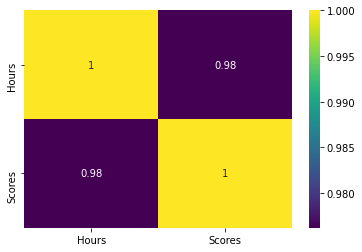

In [6]:
#Check the correlation
sns.heatmap(st.corr(),annot=True,cmap='viridis')

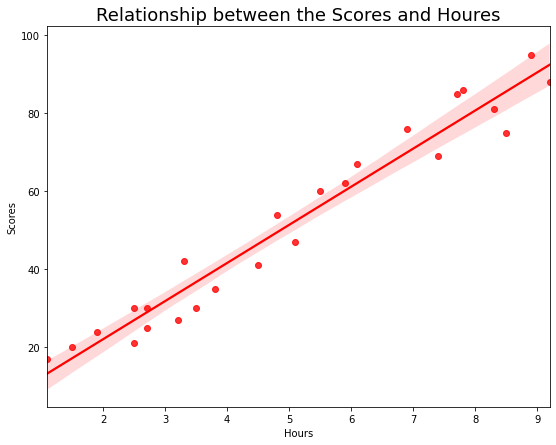

In [7]:
#Display the relationship between the Hours data and the score data with the help of regplot
plt.figure(figsize=(9,7))
sns.regplot(x='Hours',y='Scores',data=st,marker='o',color='r',scatter=True)
plt.title("Relationship between the Scores and Houres",fontsize=18)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [8]:
#Split the data in to x and y
x=st.drop('Scores',1)  #input values
y=st['Scores']  #output values

##### Model building

* Linear Regression

Linear Regression is a Supervised machine learning algorithem which is used to check the relationship between the input and output variables.The prediction of the output lables based on finding the best fit line i.e.,(y=mx+c) also, the main assumption is to reduce the error between the data points to the best fit line by reducing the residual sum of errors.

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [11]:
#get the coefficient and intercept
print('Coefficient: ',lr.coef_)
print('Intercept: ',lr.intercept_)

Coefficient:  [10.28085594]
Intercept:  -0.33798242262130884


In [12]:
#prediction on the validation data
lr_pred=lr.predict(x_test)
lr_pred[:9]

array([19.19564387, 25.36415743, 91.16163546, 87.04929308, 10.97095911])

In [13]:
#Compare the actual and predicted values
pd.DataFrame({'Actual_values':y_test,'Predicted_values':lr_pred})

,Actual_values,Predicted_values
17,24,19.195644
16,30,25.364157
15,95,91.161635
3,75,87.049293
14,17,10.970959


In [14]:
#Check th metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error: ',mean_squared_error(y_test,lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,lr_pred))
print('R2_score: ',r2_score(y_test,lr_pred))

Mean squared error:  48.16814286646674
Mean absolute error:  6.271379442109278
R2_score:  0.949812304256828


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
prediction=lr.predict([[9.25]])
print('The predicted score of a student who studied 9.25/day : ',prediction)

The predicted score of a student who studied 9.25/day :  [94.75993504]


#### Thank  you :)